In [1]:
!pip install -U scikit-learn

In [2]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\watani mall\desktop\ai-lab\ai_lab\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: mlxtend


In [3]:
!python -c "import sklearn; sklearn.show_versions()"


System:
    python: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Watani Mall\Desktop\Ai-Lab\Ai_lab\Scripts\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
      sklearn: 1.3.2
          pip: 23.3.1
   setuptools: 49.2.1
        numpy: 1.24.4
        scipy: 1.10.1
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.4
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
    num_threads: 4
         prefix: vcomp
       filepath: C:\Users\Watani Mall\Desktop\Ai-Lab\Ai_lab\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None

       user_api: blas
   internal_api: openblas
    num_threads: 4
         prefix: libopenblas
       filepath: C:\Users\Watani Mall\Desktop\Ai-Lab\Ai_lab\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
        version: 0.3.21
threading_layer: pthreads
   architecture: Haswell

 

In [4]:
import numpy as np
def true_fun(X):
    return np.sin(1.5 * np.pi * X)
np.random.seed(0)
n_samples = 40
X = np.random.rand(n_samples)
X_train = np.sort(X[:n_samples//2])
y_train = true_fun(X_train) + np.random.randn(n_samples//2) * 0.1
X_test = np.sort(X[n_samples//2:])
y_test = true_fun(X_test) + np.random.randn(n_samples//2) * 0.1

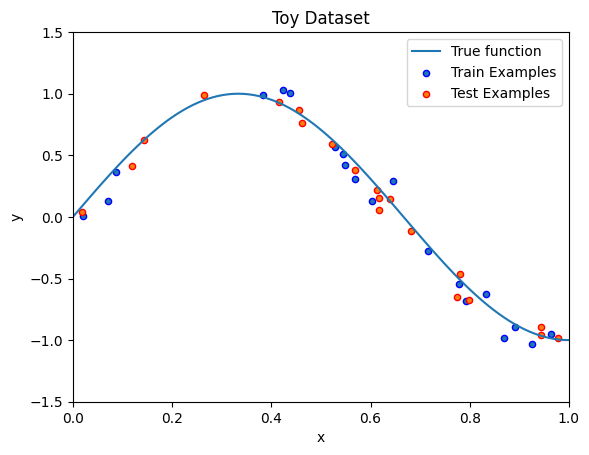

In [5]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()

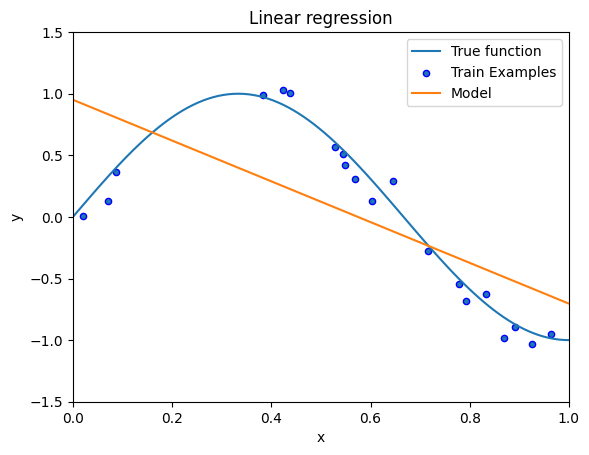

In [6]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()

In [7]:
# Task 1
y = linear_regression.predict(X_test[:, np.newaxis])
u = (y - y_test) ** 2
u = np.sum(u)
u

3.472978188261996

In [8]:
y = linear_regression.predict(X_train[:, np.newaxis])
u = (y - y_train) ** 2
u = np.sum(u)
u

4.929835011183329

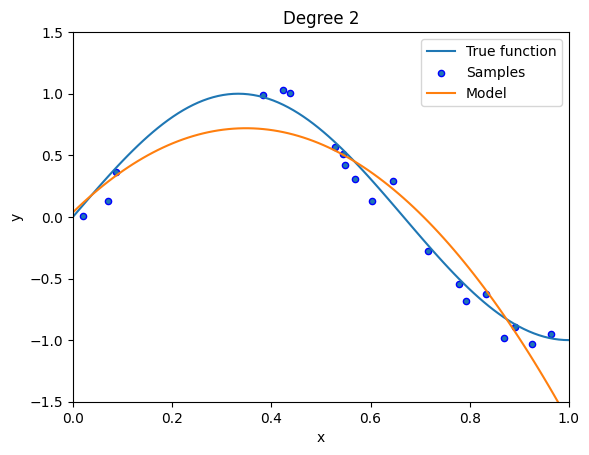

(1.1253203639423832, 0.8807843500090838)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
def poly_reg(X_train, y_train, X_test, y_test, degree = 2, draw=True):
    polynomial_features = PolynomialFeatures(degree, include_bias=True)
    q_model = LinearRegression()
    q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]),
    y_train)
    x = np.linspace(0, 1, 100)
    if draw:
        plt.plot(x, true_fun(x), label="True function")
        plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
        plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:,
        np.newaxis])), label="Model")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim((-1.5, 1.5))
        plt.legend(loc="best")
        plt.title("Degree 2")
        plt.show()
    y = q_model.predict(polynomial_features.fit_transform(X_test[:, np.newaxis]))
    test_mse = np.sum((y - y_test) ** 2)

    y = q_model.predict(polynomial_features.fit_transform(X_train[:, np.newaxis]))
    train_mse = np.sum((y - y_train) ** 2)
    return test_mse, train_mse
poly_reg(X_train, y_train, X_test, y_test)

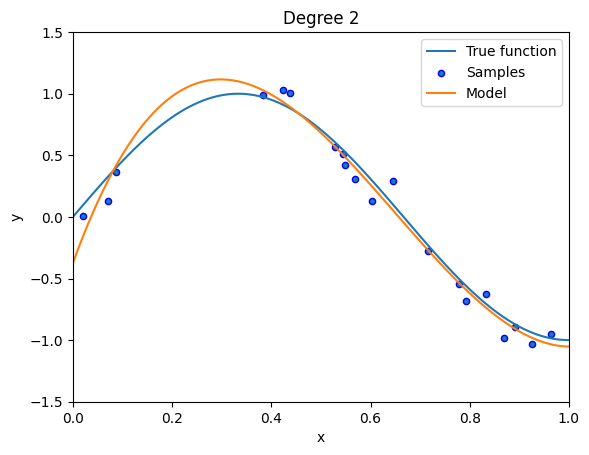

(0.19351479604641542, 0.2161821951977424)

In [10]:
poly_reg(X_train, y_train, X_test, y_test, 3)

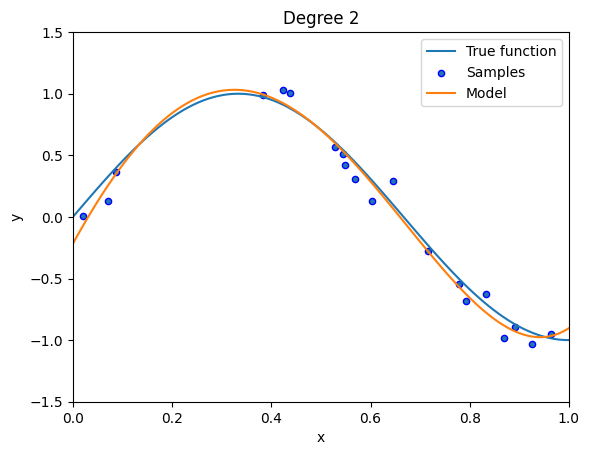

(0.09283598599625298, 0.18661041158053573)

In [11]:
poly_reg(X_train, y_train, X_test, y_test, 4)

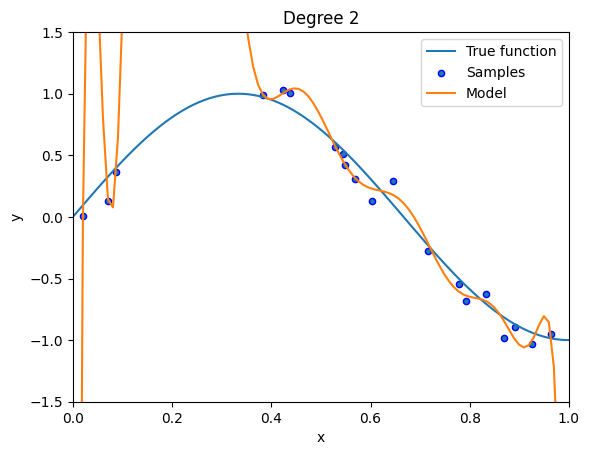

(147.8855656426285, 0.07164434412042328)

In [12]:
poly_reg(X_train, y_train, X_test, y_test, 12)

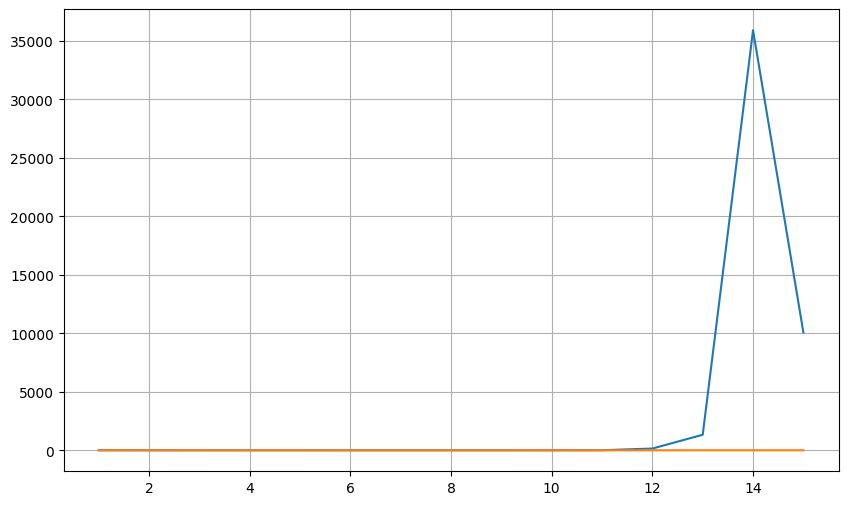

In [13]:
degrees = range(1, 16)
mse_test_results = []
mse_train_results = []

for degree in degrees:
    mse_test, mse_train = poly_reg(X_train, y_train, X_test, y_test, degree, False)
    mse_test_results.append(mse_test)
    mse_train_results.append(mse_train)

plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_test_results, label='Test')
plt.plot(degrees, mse_train_results, label='Train')
plt.grid(True)
plt.show()

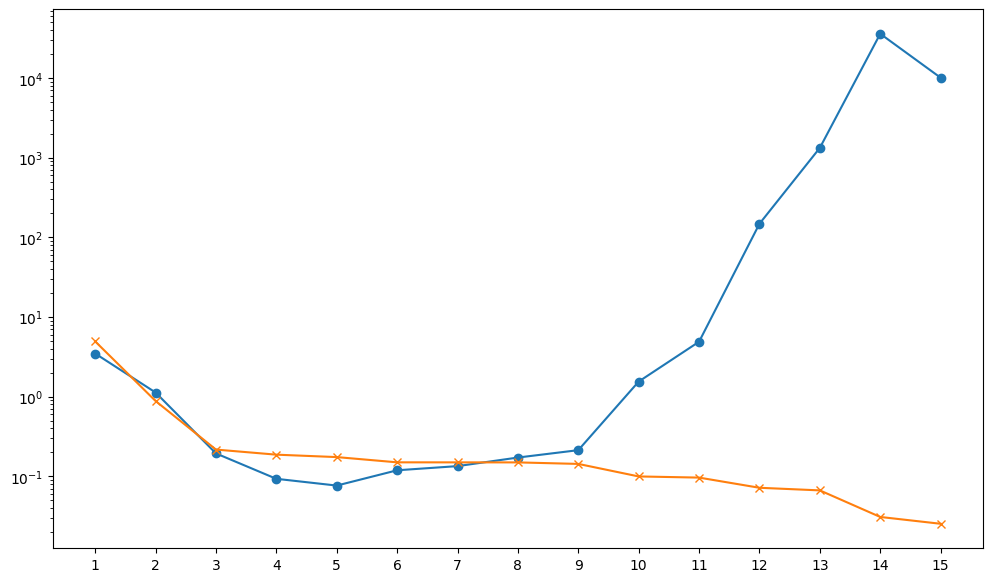

In [14]:
plt.figure(figsize=(12, 7))
plt.semilogy(degrees, mse_test_results, label='test', marker='o')
plt.semilogy(degrees, mse_train_results, label='train', marker='x')
plt.xticks(degrees)
plt.show()


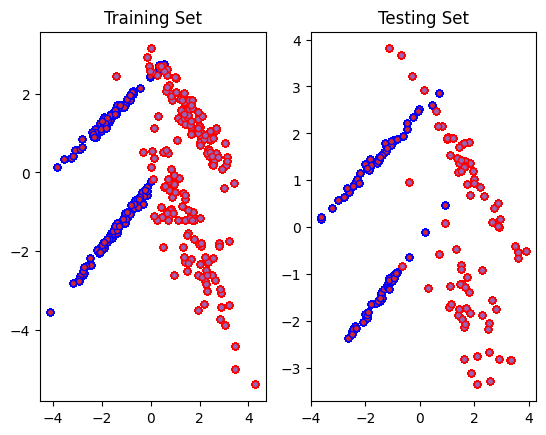

In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=42, 
                           shuffle=True, class_sep=1.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
colors = ["b", "r"]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Training Set")
ax2.set_title("Testing Set")
for c in y_train:
    ax1.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
    [X_train[i, 1] for i in np.where(y_train==c)],
    edgecolor=colors[c], s=20, label="Samples")
    ax2.scatter([X_test[i, 0] for i in np.where(y_test==c)] ,
    [X_test[i, 1] for i in np.where(y_test==c)],
    edgecolor=colors[c], s=20, label="Samples")

Training Accuracy:  0.9671641791044776
Testing Accuracy:  0.8787878787878788
              precision    recall  f1-score   support

           0    0.84043   0.94048   0.88764        84
           1    0.92958   0.81481   0.86842        81

    accuracy                        0.87879       165
   macro avg    0.88500   0.87765   0.87803       165
weighted avg    0.88419   0.87879   0.87821       165



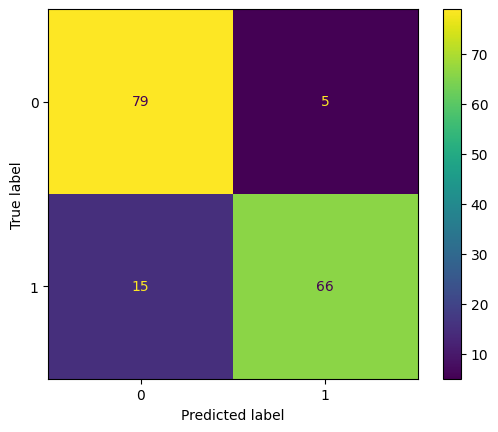

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_recall_fscore_support

def random_forrest(X_train, y_train, X_test, y_test, n_estimators=2, plot=False):
    clf = RandomForestClassifier(n_estimators=n_estimators,
    criterion="entropy",
    max_features="sqrt", max_samples=.8,
    random_state=0)
    clf.fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    
    print("Training Accuracy: ",clf.score(X_train, y_train))
    print("Testing Accuracy: ",clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    if plot:
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
        display_labels=clf.classes_)
        disp.plot()
    return classification_report(y_test,y_pred,digits = 5), train_accuracy, test_accuracy
print(random_forrest(X_train, y_train, X_test, y_test, plot=True)[0])

In [17]:
num_trees = list(range(1, 20))
training_accuracies = []
testing_accuracies = []

for i in num_trees:
    _, training_accuracy, test_accuracy = random_forrest(X_train, y_train, X_test, y_test, i)
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(test_accuracy)
    #print(f"For trees = {i}, the training accuracy was {training_accuracy} and the testing was {test_accuracy}")

Training Accuracy:  0.9850746268656716
Testing Accuracy:  0.9515151515151515
Training Accuracy:  0.9671641791044776
Testing Accuracy:  0.8787878787878788
Training Accuracy:  0.9850746268656716
Testing Accuracy:  0.896969696969697
Training Accuracy:  0.991044776119403
Testing Accuracy:  0.9030303030303031
Training Accuracy:  0.9940298507462687
Testing Accuracy:  0.9515151515151515
Training Accuracy:  0.9880597014925373
Testing Accuracy:  0.9515151515151515
Training Accuracy:  0.9850746268656716
Testing Accuracy:  0.9515151515151515
Training Accuracy:  0.9880597014925373
Testing Accuracy:  0.9515151515151515
Training Accuracy:  0.991044776119403
Testing Accuracy:  0.9515151515151515
Training Accuracy:  0.9940298507462687
Testing Accuracy:  0.9515151515151515
Training Accuracy:  0.9970149253731343
Testing Accuracy:  0.9515151515151515
Training Accuracy:  0.9940298507462687
Testing Accuracy:  0.9575757575757575
Training Accuracy:  0.9970149253731343
Testing Accuracy:  0.9515151515151515
Tr

In [18]:
num_trees

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

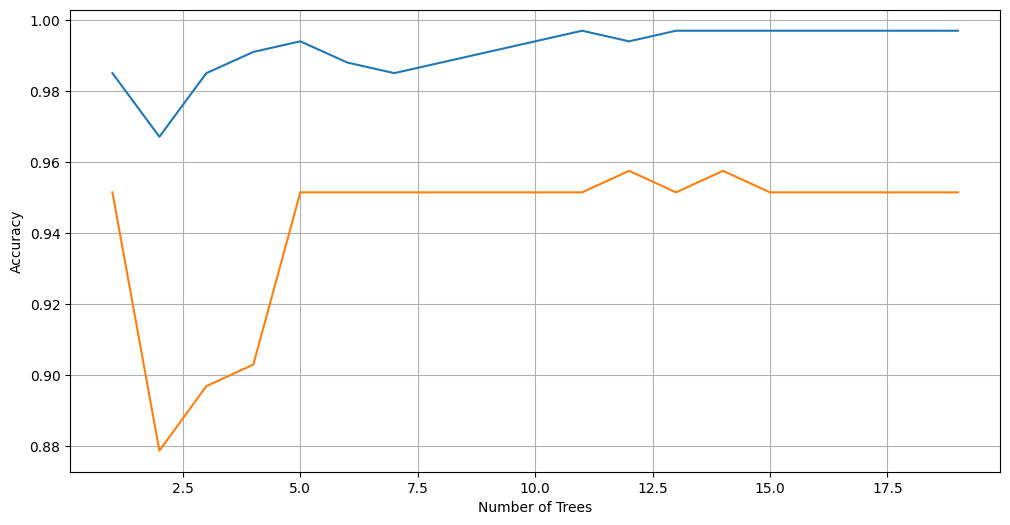

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(num_trees, training_accuracies, label='Training')
plt.plot(num_trees, testing_accuracies, label='Testing')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

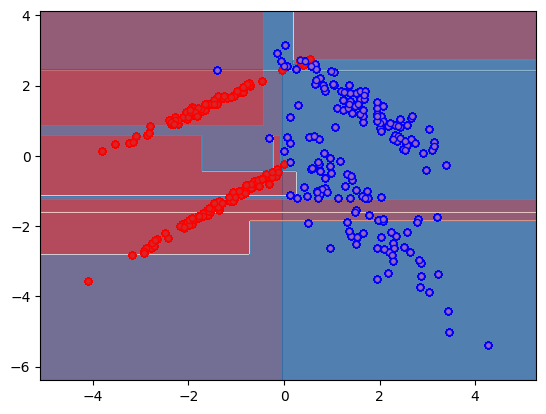

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
def random_cmap(X_train, y_train, X_test, y_test, n_estimators=2, plot=False):
    cmap = plt.cm.RdBu
    plot_step = 0.02 # fine step width for decision surface contours
    clf = RandomForestClassifier(n_estimators=n_estimators, criterion="entropy",
    max_features="sqrt", max_samples=.8,
    random_state=0)
    clf.fit(X_train, y_train)
    # Now plot the decision boundary using a fine mesh as input to a
    # filled contour plot
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step))
    estimator_alpha = 1.0 / len(clf.estimators_)
    for tree in clf.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
    colors = ["r", "b"]
    for c in y_train:
        plt.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
        [X_train[i, 1] for i in np.where(y_train==c)],
        edgecolor=colors[c], s=20, label="Samples")
random_cmap(X_train, y_train, X_test, y_test)

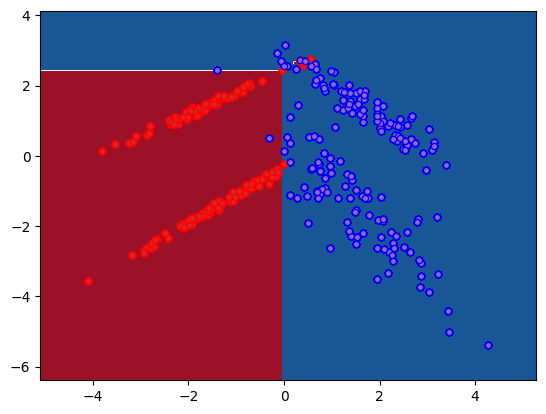

In [21]:
random_cmap(X_train, y_train, X_test, y_test, 1)

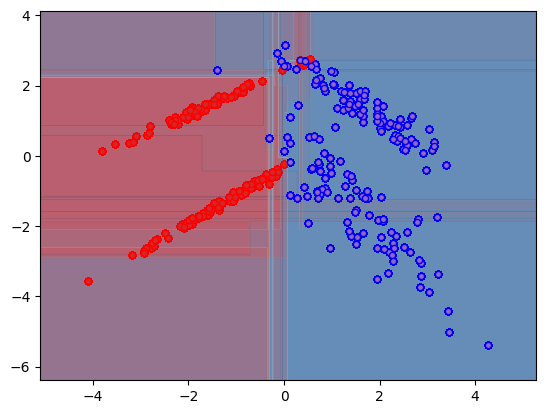

In [22]:
random_cmap(X_train, y_train, X_test, y_test, 8)

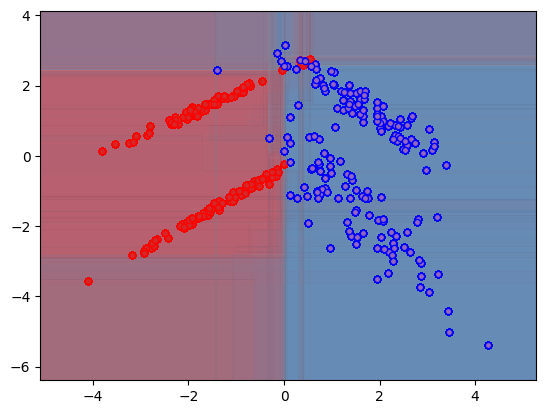

In [23]:
random_cmap(X_train, y_train, X_test, y_test, 40)

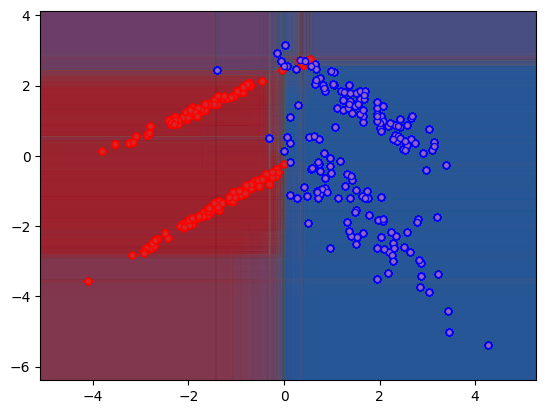

In [24]:
random_cmap(X_train, y_train, X_test, y_test, 165)

In [25]:
!pip install mlxtend

In [39]:
len(X)

500

<Axes: >

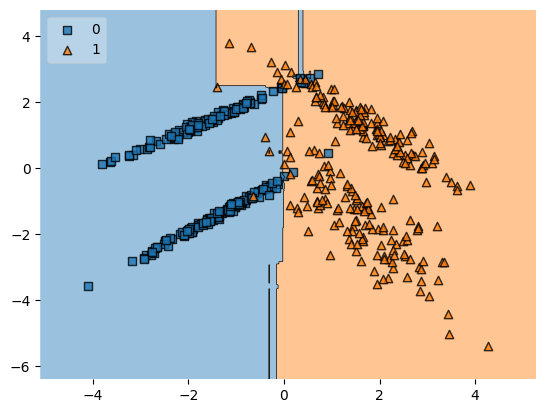

In [40]:
from mlxtend.plotting import plot_decision_regions
clf = RandomForestClassifier(n_estimators=500, criterion="entropy",
    max_features="sqrt", max_samples=.8,
    random_state=0)
clf.fit(X_train, y_train)

plot_decision_regions(X, y, clf=clf, legend=2)

In [27]:
from sklearn import svm
clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.9731343283582089
Testing Accuracy:  0.9333333333333333


In [28]:
def svm_cmap(X_train, y_train, X_test, y_test, C=100, kernel='linear'):
    cmap = plt.cm.RdBu
    plot_step = 0.02  # fine step width for decision surface contours
    
    clf = svm.SVC(kernel=kernel, C=C)
    clf.fit(X_train, y_train)
    
    # Now plot the decision boundary using a fine mesh as input to a
    # filled contour plot
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=cmap)
    
    colors = ["r", "b"]
    unique_classes = np.unique(y_train)
    for i, c in enumerate(unique_classes):
        plt.scatter(X_train[y_train == c, 0], X_train[y_train == c, 1],
                    color=colors[i], edgecolor='k', s=20, label=f"Class {c}")
    
    plt.legend()
    plt.show()

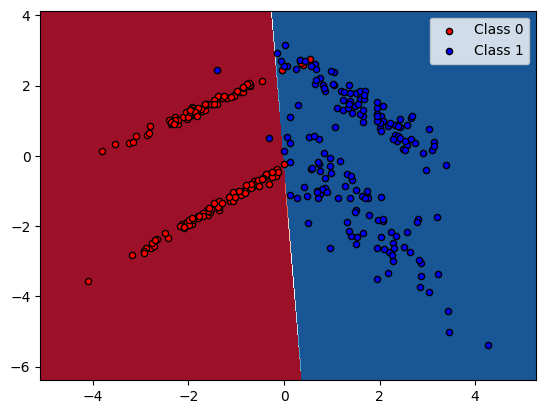

In [29]:
svm_cmap(X_train, y_train, X_test, y_test)

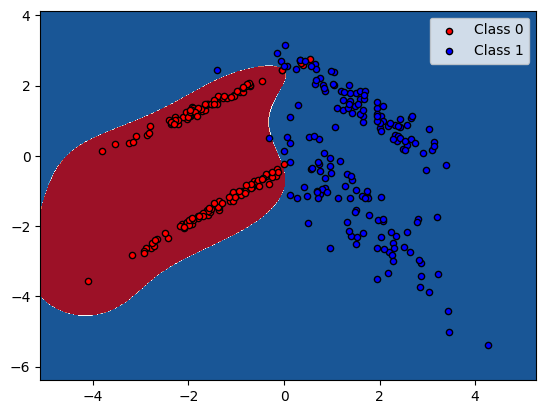

In [30]:
svm_cmap(X_train, y_train, X_test, y_test, C=100, kernel='rbf')

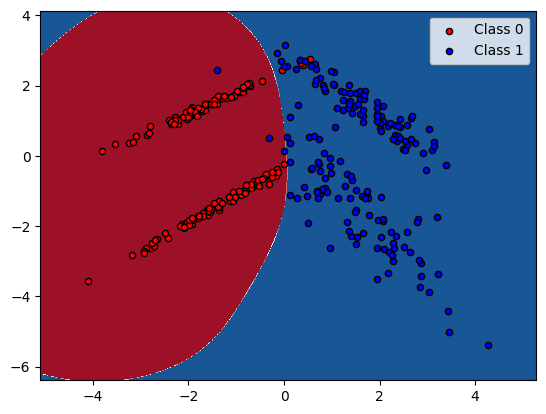

In [31]:
svm_cmap(X_train, y_train, X_test, y_test, C=0.5, kernel='rbf')

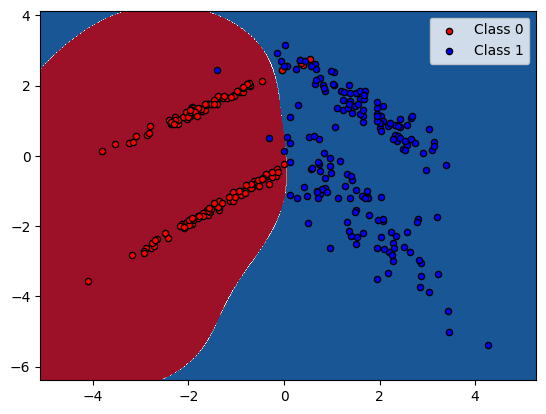

In [32]:
svm_cmap(X_train, y_train, X_test, y_test, C=1, kernel='rbf')

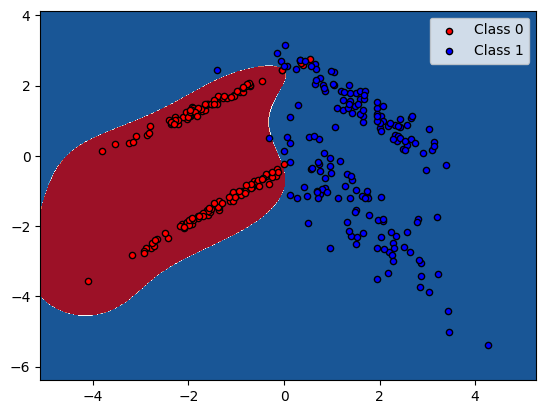

In [33]:
svm_cmap(X_train, y_train, X_test, y_test, C=100, kernel='rbf')

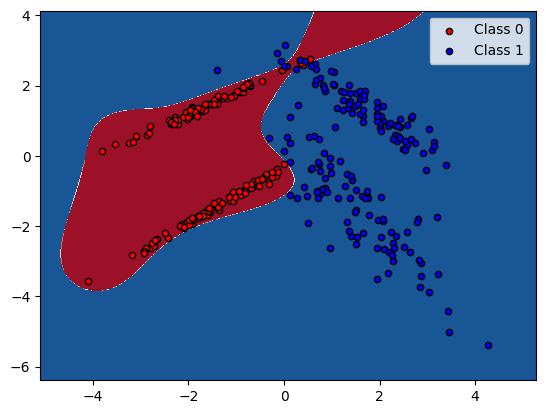

In [34]:
svm_cmap(X_train, y_train, X_test, y_test, C=5000, kernel='rbf')

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {"kernel":("linear", "rbf"), "C":[1, 10, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [36]:
clf.cv_results_

{'mean_fit_time': array([0.00140066, 0.00160084, 0.00139928, 0.00119987, 0.00219917,
        0.0015995 ]),
 'std_fit_time': array([0.00048953, 0.00049025, 0.0004893 , 0.00039928, 0.00074826,
        0.00048975]),
 'mean_score_time': array([0.00040016, 0.0011992 , 0.00060034, 0.00080023, 0.00060048,
        0.00060024]),
 'std_score_time': array([0.0004901 , 0.00039926, 0.00049017, 0.00040011, 0.00049029,
        0.0004901 ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 100, 'kernel': 'linear'},
  {'C': 100, 'kernel': 'rbf'